In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yt
import trident
from get_refine_box import *
import cPickle
from astropy.table import Table
from consistency import *

In [2]:
def _HI_column_density(field,data):
    coldens = data[('gas','H_p0_number_density')]*data['dx'].in_units('cm')
    return coldens

yt.add_field(('gas','HI_column_density'),units='cm**-2',
             function=_HI_column_density)



track_name = '/Users/dalek/data/Molly/nref11n_nref10f_refine200kpc_z4to2/halo_track_total'
ds = yt.load('/Users/dalek/data/Molly/nref11c_nref9f/DD0946/DD0946')
trident.add_ion_fields(ds,ions=['O VI','Si IV','C IV','C III','Si III'])


/Users/dalek/repos/yt/yt/fields/local_fields.py:46: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  warnings.warn("Because 'sampling_type' not specified, yt will "
yt : [INFO     ] 2020-05-04 12:20:47,866 Parameters: current_time              = 269.566527818
yt : [INFO     ] 2020-05-04 12:20:47,869 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2020-05-04 12:20:47,874 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-05-04 12:20:47,883 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-05-04 12:20:47,891 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-05-04 12:20:47,893 Parameters: current_redshift          = 1.03136547042
yt : [INFO     ] 2020-05-04 12:20:47,897 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2020-05-04 12:20:47,912 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2020-05-04 12:20:47,914 Parameters: hubble_consta

In [3]:
track = Table.read(track_name, format='ascii')
track.sort('col1')
rb,rb_center,rb_width = get_refine_box(ds,ds.current_redshift,track)


('using this loc:', <Table length=1>
   col1      col2      col3      col4      col5      col6      col7    col8
 float64   float64   float64   float64   float64   float64   float64  int64
--------- --------- --------- --------- --------- --------- --------- -----
1.0368548 0.4915575 0.4822726 0.5035052 0.4935575 0.4842726 0.5055052    10)


In [5]:
dz = ds.quan(19.,'kpc').in_units('code_length').value 
dx = ds.quan(19.,'kpc').in_units('code_length').value ## originally 5!
new_pos = [rb_center[0]+dx,rb_center[1]+dx,rb_center[2]+dz]

yt : [INFO     ] 2020-05-04 12:22:01,568 Projection completed
yt : [INFO     ] 2020-05-04 12:22:01,570 xlim = 0.481155 0.485390
yt : [INFO     ] 2020-05-04 12:22:01,572 ylim = 0.502388 0.506623
yt : [INFO     ] 2020-05-04 12:22:01,577 xlim = 0.481155 0.485390
yt : [INFO     ] 2020-05-04 12:22:01,579 ylim = 0.502388 0.506623
yt : [INFO     ] 2020-05-04 12:22:01,586 Making a fixed resolution buffer of (('gas', 'H_p0_number_density')) 800 by 800



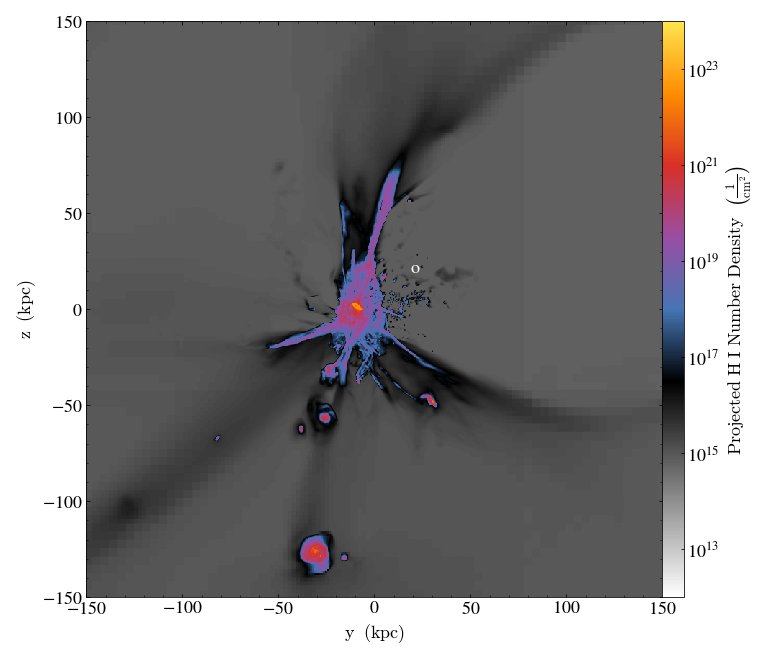

In [6]:
## Showing the position of the small box I've defined
proj = yt.ProjectionPlot(ds,'x','H_p0_number_density',center=rb_center,width=(300.,'kpc'))
proj.set_cmap('H_p0_number_density',h1_color_map)
proj.set_zlim('H_p0_number_density',h1_proj_min,h1_proj_max)
proj.annotate_text(new_pos,'o')
proj.show()

yt : [INFO     ] 2020-05-04 12:22:25,985 xlim = 0.491557 0.493557
yt : [INFO     ] 2020-05-04 12:22:25,987 ylim = 0.482273 0.484273
yt : [INFO     ] 2020-05-04 12:22:25,990 xlim = 0.491557 0.493557
yt : [INFO     ] 2020-05-04 12:22:25,994 ylim = 0.482273 0.484273
yt : [INFO     ] 2020-05-04 12:22:26,003 Making a fixed resolution buffer of (('gas', 'H_p0_number_density')) 800 by 800



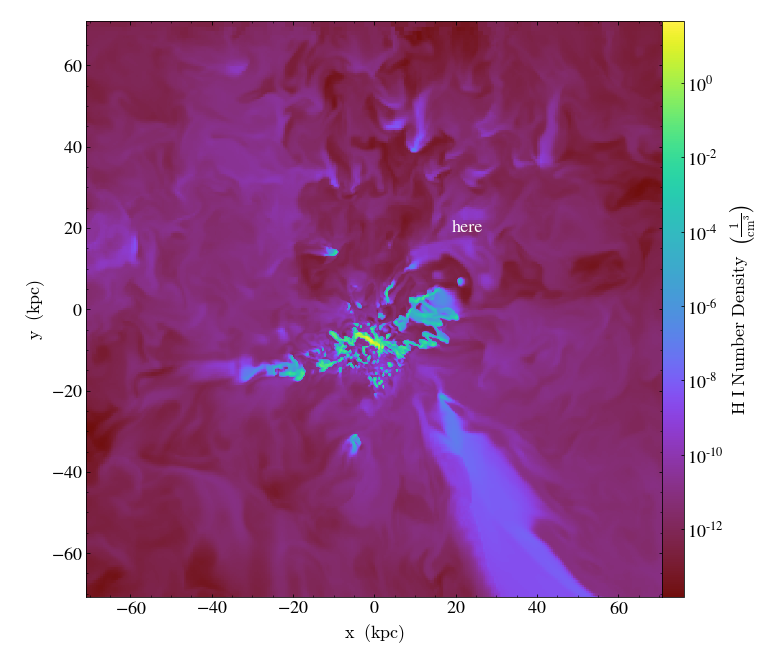

In [7]:
sl = yt.SlicePlot(ds,'z','H_p0_number_density',center=rb_center,width=rb_width)
sl.annotate_text(new_pos,'here')
sl.show()

yt : [INFO     ] 2020-05-04 12:22:33,960 xlim = 0.483329 0.483753
yt : [INFO     ] 2020-05-04 12:22:33,962 ylim = 0.504562 0.504985
yt : [INFO     ] 2020-05-04 12:22:33,965 xlim = 0.483329 0.483753
yt : [INFO     ] 2020-05-04 12:22:33,971 ylim = 0.504562 0.504985
yt : [INFO     ] 2020-05-04 12:22:33,979 Making a fixed resolution buffer of (('gas', 'H_p0_number_density')) 800 by 800



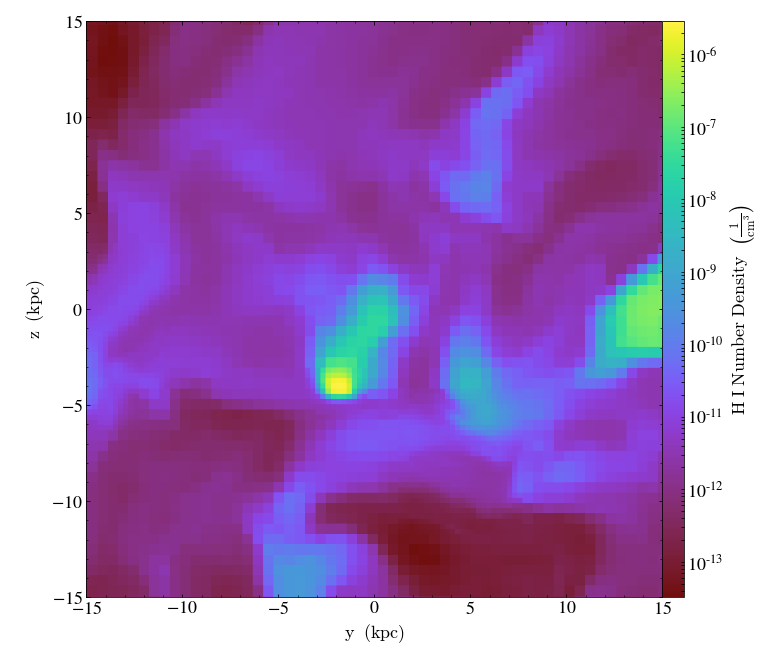

In [8]:
#Zooming in on the small region! There are clumps!
sl = yt.SlicePlot(ds,'x','H_p0_number_density',center=new_pos,width=(30.,'kpc'))
sl.show()

yt : [INFO     ] 2020-05-04 12:22:50,107 xlim = 0.483329 0.483753
yt : [INFO     ] 2020-05-04 12:22:50,109 ylim = 0.504562 0.504985
yt : [INFO     ] 2020-05-04 12:22:50,116 xlim = 0.483329 0.483753
yt : [INFO     ] 2020-05-04 12:22:50,117 ylim = 0.504562 0.504985
yt : [INFO     ] 2020-05-04 12:22:50,127 Making a fixed resolution buffer of (('gas', 'HI_column_density')) 800 by 800



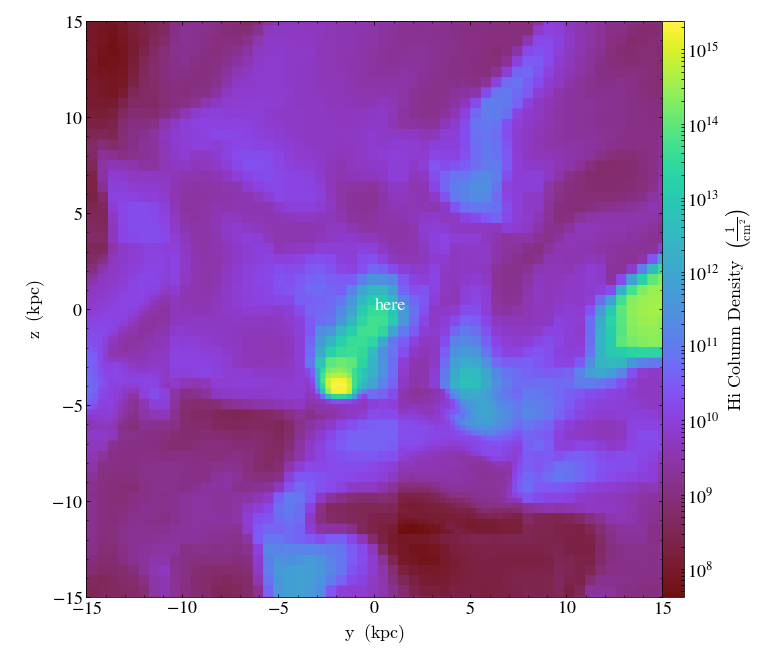

In [9]:
sl = yt.SlicePlot(ds,'x','HI_column_density',center=new_pos,width=(30.,'kpc'))
sl.annotate_text(new_pos,'here')
sl.show()

yt : [INFO     ] 2020-05-04 12:22:58,694 xlim = 0.492614 0.493038
yt : [INFO     ] 2020-05-04 12:22:58,695 ylim = 0.483329 0.483753
yt : [INFO     ] 2020-05-04 12:22:58,698 xlim = 0.492614 0.493038
yt : [INFO     ] 2020-05-04 12:22:58,700 ylim = 0.483329 0.483753
yt : [INFO     ] 2020-05-04 12:22:58,705 Making a fixed resolution buffer of (('gas', 'O_p5_number_density')) 800 by 800



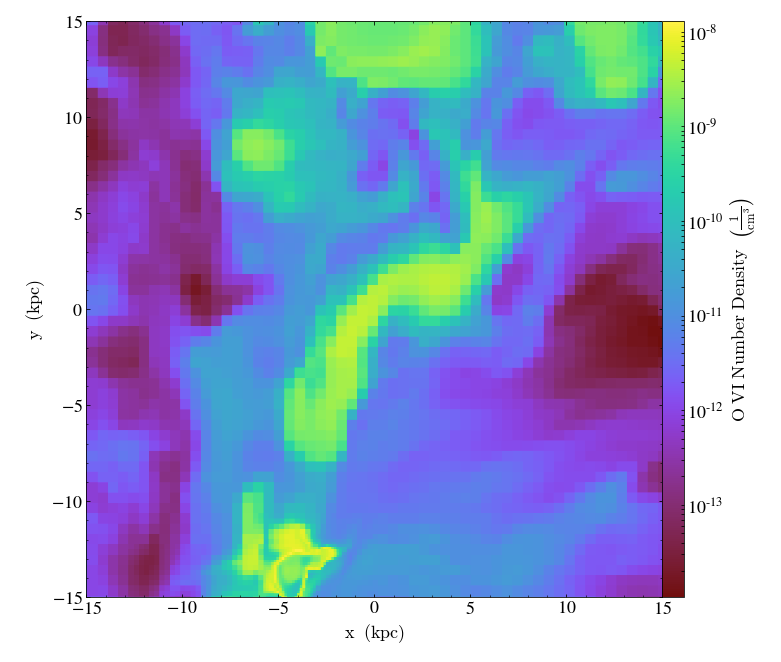

In [10]:
sl = yt.SlicePlot(ds,'z','O_p5_number_density',center=new_pos,width=(30.,'kpc'))
sl.show()

In [11]:
# Create the small box that we want to perform the clump finding in
delta = ds.quan(15.,'kpc').in_units('code_length').value
xL,xR = new_pos[0]-delta,new_pos[0]+delta
yL,yR = new_pos[1]-delta,new_pos[1]+delta
zL,zR = new_pos[2]-delta,new_pos[2]+delta
small_box = ds.r[xL:xR,yL:yR,zL:zR]

In [ ]:
#Reminding myself that you can set further specifications on the types of clumps identified
#such as the minimum number of cells required to be considered a clump and to report the total number of cells
#in any clump that has been identified

#master_clump = Clump(small_box,('gas','H_p0_number_density'))
#master_clump.add_validator('min_cells',5)
#master_clump.add_info_item('total_cells')

In [12]:
from yt.analysis_modules.level_sets.api import *

#Setting the contour limits and the step sizes the algorithm takes in drawing new clumps
c_min = 1e-10
c_max = 1e-9
step = 2.

master_clump = Clump(small_box,('gas','H_p0_number_density'))
#master_clump = Clump(small_box,('gas','O_p5_number_density'))

find_clumps(master_clump,c_min,c_max,step)

/Users/dalek/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: The level_sets module has been moved to yt.data_objects.level_sets.This import is deprecated and will be removed in a future release.Please, change the import in your scripts from 'from yt.analysis_modules.level_sets' to 'from yt.data_objects.level_sets.'.
  """Entry point for launching an IPython kernel.
yt : [INFO     ] 2020-05-04 12:25:03,476 Finding clumps: min: 1.000000e-10, max: 1.000000e-09, step: 2.000000
yt : [INFO     ] 2020-05-04 12:25:03,929 Linking node (407) contours.
yt : [INFO     ] 2020-05-04 12:25:05,580 Linked.
Updating joins ... : 100%|██████████| 407/407 [00:00<00:00, 27390.88it/s]
yt : [INFO     ] 2020-05-04 12:25:05,839 Investigating 34 children.
yt : [INFO     ] 2020-05-04 12:25:05,840 Finding clumps: min: 2.000000e-10, max: 1.000000e-09, step: 2.000000
yt : [INFO     ] 2020-05-04 12:25:07,120 Linking node (1) contours.
yt : [INFO     ] 2020-05-04 12:25:07,139 

yt : [INFO     ] 2020-05-04 12:25:28,758 2 of 2 children survived.
yt : [INFO     ] 2020-05-04 12:25:28,759 Finding clumps: min: 2.000000e-10, max: 1.000000e-09, step: 2.000000
yt : [INFO     ] 2020-05-04 12:25:30,133 Linking node (1) contours.
yt : [INFO     ] 2020-05-04 12:25:30,154 Linked.
yt : [INFO     ] 2020-05-04 12:25:30,158 Finding clumps: min: 2.000000e-10, max: 1.000000e-09, step: 2.000000
yt : [INFO     ] 2020-05-04 12:25:31,469 Linking node (27) contours.
yt : [INFO     ] 2020-05-04 12:25:31,587 Linked.
Updating joins ... : 100%|██████████| 27/27 [00:00<00:00, 44047.53it/s]
yt : [INFO     ] 2020-05-04 12:25:31,744 Investigating 5 children.
yt : [INFO     ] 2020-05-04 12:25:31,745 Finding clumps: min: 4.000000e-10, max: 1.000000e-09, step: 2.000000
yt : [INFO     ] 2020-05-04 12:25:33,121 Linking node (11) contours.
yt : [INFO     ] 2020-05-04 12:25:33,203 Linked.
Updating joins ... : 100%|██████████| 11/11 [00:00<00:00, 26965.13it/s]
yt : [INFO     ] 2020-05-04 12:25:33,34

yt : [INFO     ] 2020-05-04 12:25:49,990 Finding clumps: min: 2.000000e-10, max: 1.000000e-09, step: 2.000000
yt : [INFO     ] 2020-05-04 12:25:51,274 Linking node (1) contours.
yt : [INFO     ] 2020-05-04 12:25:51,300 Linked.
yt : [INFO     ] 2020-05-04 12:25:51,303 Finding clumps: min: 2.000000e-10, max: 1.000000e-09, step: 2.000000
yt : [INFO     ] 2020-05-04 12:25:52,790 Linking node (1) contours.
yt : [INFO     ] 2020-05-04 12:25:52,818 Linked.
yt : [INFO     ] 2020-05-04 12:25:52,983 Finding clumps: min: 4.000000e-10, max: 1.000000e-09, step: 2.000000
yt : [INFO     ] 2020-05-04 12:25:52,985 Wiping out existing children clumps: 1.
yt : [INFO     ] 2020-05-04 12:25:53,074 Linking node (1) contours.
yt : [INFO     ] 2020-05-04 12:25:53,103 Linked.
yt : [INFO     ] 2020-05-04 12:25:53,239 Finding clumps: min: 8.000000e-10, max: 1.000000e-09, step: 2.000000
yt : [INFO     ] 2020-05-04 12:25:53,240 Wiping out existing children clumps: 1.
yt : [INFO     ] 2020-05-04 12:25:53,321 Linkin

yt : [INFO     ] 2020-05-04 12:26:11,400 Linked.
Updating joins ... : 100%|██████████| 14/14 [00:00<00:00, 49847.42it/s]
yt : [INFO     ] 2020-05-04 12:26:11,544 Finding clumps: min: 4.000000e-10, max: 1.000000e-09, step: 2.000000
yt : [INFO     ] 2020-05-04 12:26:11,545 Wiping out existing children clumps: 1.
yt : [INFO     ] 2020-05-04 12:26:11,630 Linking node (14) contours.
yt : [INFO     ] 2020-05-04 12:26:11,709 Linked.
Updating joins ... : 100%|██████████| 14/14 [00:00<00:00, 32122.68it/s]
yt : [INFO     ] 2020-05-04 12:26:11,850 Finding clumps: min: 8.000000e-10, max: 1.000000e-09, step: 2.000000
yt : [INFO     ] 2020-05-04 12:26:11,852 Wiping out existing children clumps: 1.
yt : [INFO     ] 2020-05-04 12:26:11,941 Linking node (14) contours.
yt : [INFO     ] 2020-05-04 12:26:12,021 Linked.
Updating joins ... : 100%|██████████| 14/14 [00:00<00:00, 38031.25it/s]
yt : [INFO     ] 2020-05-04 12:26:12,201 Finding clumps: min: 1.600000e-09, max: 1.000000e-09, step: 2.000000
yt : [I

yt : [INFO     ] 2020-05-04 12:26:27,453 Wiping out existing children clumps: 1.
yt : [INFO     ] 2020-05-04 12:26:27,553 Linking node (14) contours.
yt : [INFO     ] 2020-05-04 12:26:27,675 Linked.
Updating joins ... : 100%|██████████| 14/14 [00:00<00:00, 20171.85it/s]
yt : [INFO     ] 2020-05-04 12:26:27,823 Finding clumps: min: 1.600000e-09, max: 1.000000e-09, step: 2.000000
yt : [INFO     ] 2020-05-04 12:26:27,825 Finding clumps: min: 2.000000e-10, max: 1.000000e-09, step: 2.000000
yt : [INFO     ] 2020-05-04 12:26:29,117 Linking node (13) contours.
yt : [INFO     ] 2020-05-04 12:26:29,209 Linked.
Updating joins ... : 100%|██████████| 13/13 [00:00<00:00, 29346.58it/s]
yt : [INFO     ] 2020-05-04 12:26:29,358 Finding clumps: min: 4.000000e-10, max: 1.000000e-09, step: 2.000000
yt : [INFO     ] 2020-05-04 12:26:29,360 Wiping out existing children clumps: 1.
yt : [INFO     ] 2020-05-04 12:26:29,448 Linking node (13) contours.
yt : [INFO     ] 2020-05-04 12:26:29,537 Linked.
Updating j

In [13]:
#The algorithm creates a tree structure - finding clumps within clumps. Because of how I've set the contour limits,
#that won't happen here the successfully but this call just gives you the leaves, of that process.
all_clumps = get_lowest_clumps(master_clump)

/Users/dalek/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: This function has been deprecated in favor of accessing a clump's leaf nodes via 'clump.leaves'.
  This is separate from the ipykernel package so we can avoid doing imports until


yt : [INFO     ] 2020-05-04 12:29:34,902 Projection completed
yt : [INFO     ] 2020-05-04 12:29:34,904 xlim = 0.483329 0.483753
yt : [INFO     ] 2020-05-04 12:29:34,905 ylim = 0.504562 0.504985
yt : [INFO     ] 2020-05-04 12:29:34,909 xlim = 0.483329 0.483753
yt : [INFO     ] 2020-05-04 12:29:34,911 ylim = 0.504562 0.504985
yt : [INFO     ] 2020-05-04 12:29:34,914 Making a fixed resolution buffer of (('gas', 'H_p0_number_density')) 800 by 800
yt : [INFO     ] 2020-05-04 12:29:35,389 Pixelizing contour 0
yt : [INFO     ] 2020-05-04 12:29:35,514 Pixelizing contour 1
yt : [INFO     ] 2020-05-04 12:29:35,521 Pixelizing contour 2
yt : [INFO     ] 2020-05-04 12:29:35,533 Pixelizing contour 3
yt : [INFO     ] 2020-05-04 12:29:35,550 Pixelizing contour 4
yt : [INFO     ] 2020-05-04 12:29:35,562 Pixelizing contour 5
yt : [INFO     ] 2020-05-04 12:29:35,573 Pixelizing contour 6
yt : [INFO     ] 2020-05-04 12:29:35,600 Pixelizing contour 7
yt : [INFO     ] 2020-05-04 12:29:35,615 Pixelizing conto


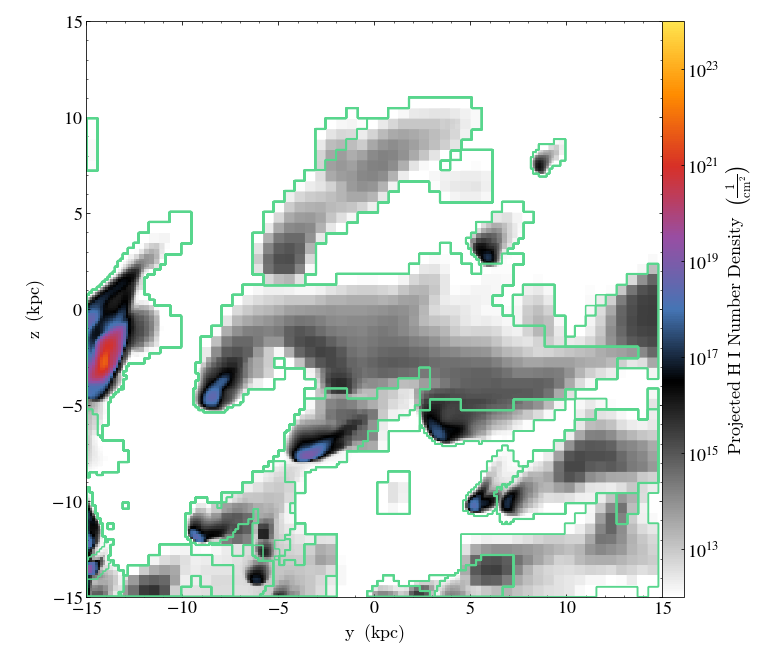

In [14]:
proj = yt.ProjectionPlot(ds,'x','H_p0_number_density',center=new_pos,data_source=small_box,width=(30.,'kpc'))
proj.set_cmap('H_p0_number_density',h1_color_map)
proj.set_zlim('H_p0_number_density',h1_proj_min,h1_proj_max)
proj.annotate_clumps(master_clump.children,plot_args={'colors':'#58D68D','linewidth':2.5})
proj.show()

#Or you can loop through all of the clumps and plot any of their properties:
#sl.annotate_point(new_pos,'H')
#for clump in all_clumps:
    #sl.annotate_point(clump.quantities['CenterOfMass'](),'x')


In [15]:
print len(master_clump.children)
print len(all_clumps)

34
45


yt : [INFO     ] 2020-05-04 12:30:03,907 Projection completed
yt : [INFO     ] 2020-05-04 12:30:03,909 xlim = 0.492614 0.493038
yt : [INFO     ] 2020-05-04 12:30:03,912 ylim = 0.483329 0.483753
yt : [INFO     ] 2020-05-04 12:30:03,915 xlim = 0.492614 0.493038
yt : [INFO     ] 2020-05-04 12:30:03,917 ylim = 0.483329 0.483753
yt : [INFO     ] 2020-05-04 12:30:03,920 Making a fixed resolution buffer of (('gas', 'O_p5_number_density')) 800 by 800
yt : [INFO     ] 2020-05-04 12:30:04,512 Pixelizing contour 0
yt : [INFO     ] 2020-05-04 12:30:04,583 Pixelizing contour 1
yt : [INFO     ] 2020-05-04 12:30:04,591 Pixelizing contour 2
yt : [INFO     ] 2020-05-04 12:30:04,599 Pixelizing contour 3
yt : [INFO     ] 2020-05-04 12:30:04,606 Pixelizing contour 4
yt : [INFO     ] 2020-05-04 12:30:04,615 Pixelizing contour 5
yt : [INFO     ] 2020-05-04 12:30:04,625 Pixelizing contour 6
yt : [INFO     ] 2020-05-04 12:30:04,633 Pixelizing contour 7
yt : [INFO     ] 2020-05-04 12:30:04,643 Pixelizing conto


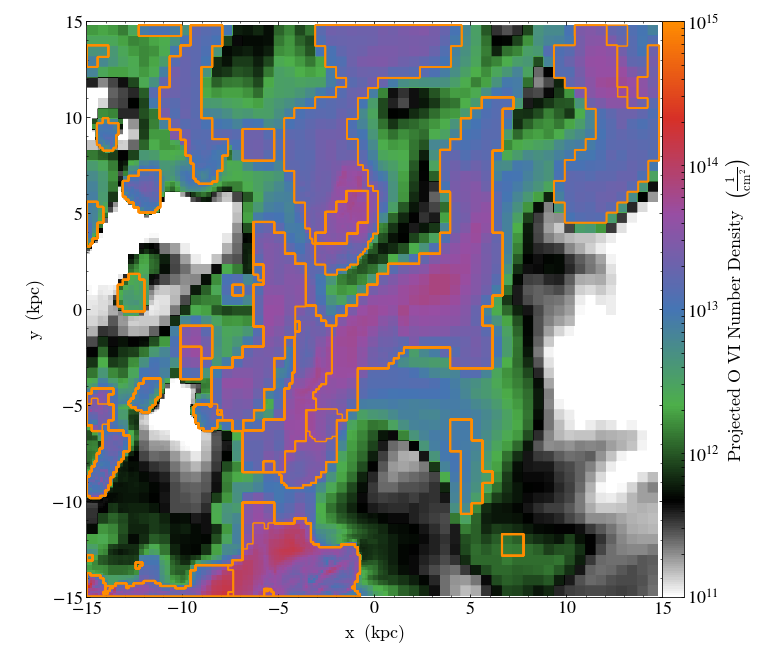

In [16]:
proj = yt.ProjectionPlot(ds,'z','O_p5_number_density',center=new_pos,data_source=small_box,width=(30.,'kpc'))
proj.set_cmap('O_p5_number_density',old_o6_color_map)
proj.set_zlim('O_p5_number_density',o6_min,o6_max)
proj.annotate_clumps(all_clumps,plot_args={'colors':'DarkOrange','linewidth':2.5})
proj.show()

### Looking at some clump properties:

In [17]:
all_clumps[0].quantities['TotalQuantity']('cell_mass').to('Msun')

109925.51446791028 Msun

In [18]:
all_clumps[0].quantities['CenterOfMass']()

YTArray([1.07668729e+26, 1.05639093e+26, 1.10283724e+26]) cm